In [1]:
import json
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' %x)

dict = {'BTC':'bitcoin', 'ETH':'ethereum', 'MATIC':'polygon', 'ADA':'cardano', 'BNB':'bnb', 'DOT':'polkadot-new', 'ALPHA':'alpha-finance-lab', 'MLT':'milc-platform', 'FLOKI':'floki-inu', 'CHZ':'chiliz', 'WOO':'wootrade', 'KDA':'kadena', 'QRDO':'qredo', 'PBX':'paribus', 'UFO':'ufo-gaming', 'USDT':'tether', 'SAND':'the-sandbox', 'CRO':'cronos', 'MTRG':'meter-governance', 'APE':'apecoin-ape', 'METIS':'metisdao', 'OCEAN':'ocean-protocol', 'AZERO':'aleph-zero', 'AURORA':'aurora-near', 'NEAR':'near-protocol', 'PYR':'vulcan-forged-pyr', 'FET':'fetch', 'SFUND':'seedify-fund', 'PRIMAL':'primal-token'}

with open('/Users/felipematsushita/Library/CloudStorage/GoogleDrive-fymatsushita@gmail.com/My Drive/Data Science Projects/Investing/stockdash/assets.json') as f:
    assets = json.load(f)

df = pd.DataFrame.from_dict(assets, orient='index')

df_crypto = df[df['local'] == 'crypto'].reset_index()
df_crypto['name'] = df_crypto['index'].apply(lambda x: dict[x])

def get_crypto_price(row):
    response = requests.get(f"https://coinmarketcap.com/currencies/{row['name']}")
    response.raise_for_status()

    soup = BeautifulSoup(response.text, 'html.parser')
    object = soup.find(class_='priceValue')
    result = float(object.getText().strip('$').replace(',',""))
    return result

df_crypto['price'] = df_crypto.apply(get_crypto_price, axis=1)
df_crypto['value'] = df_crypto['quantity'] * df_crypto['price']

#df_crypto.iloc[-1] = ['TOTAL', 'crypto', 'total', 'y', 'name', 'price', df_crypto['value'].sum()]

In [2]:
df_crypto

,index,local,quantity,dollar,name,price,value
0,BTC,crypto,0.04,y,bitcoin,17016.24,765.73
1,ETH,crypto,0.27,y,ethereum,1250.93,337.75
2,MATIC,crypto,287.10,y,polygon,0.88,253.85
3,ADA,crypto,469.00,y,cardano,0.30,142.95
4,BNB,crypto,0.29,y,bnb,276.26,80.12
5,DOT,crypto,12.50,y,polkadot-new,5.13,64.12
6,ALPHA,crypto,5120.00,y,alpha-finance-lab,0.09,480.82
7,MLT,crypto,50339.00,y,milc-platform,0.10,4813.42
8,FLOKI,crypto,23773786.00,y,floki-inu,0.00,217.91
9,CHZ,crypto,3637.00,y,chiliz,0.14,494.63


<AxesSubplot:xlabel='index', ylabel='value'>

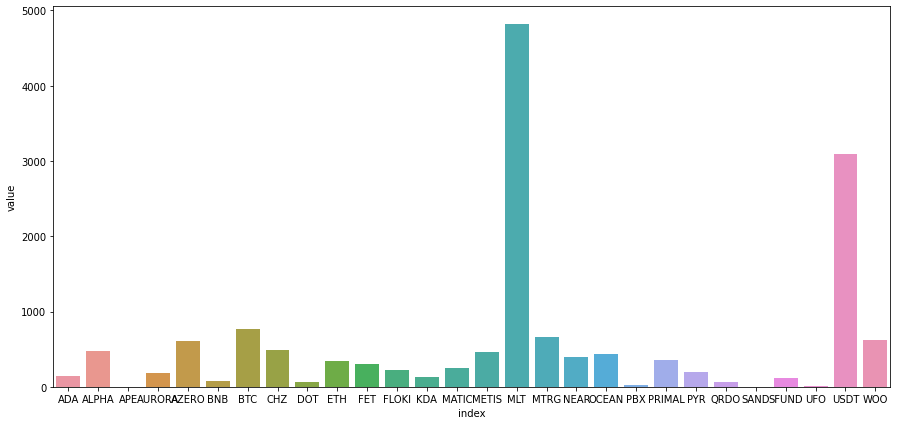

In [3]:
df2 = df_crypto[['index', 'value']]
df2 = df2.drop(17)
df3 = df2.groupby('index')['value'].sum().reset_index()
df3
plt.figure(figsize=(15,7))
sns.barplot(x=df3['index'], y=df3['value'])

In [11]:
def crypto_categories(x):
    if x == 'BTC':
        return 'BTC'
    elif x == 'ETH':
        return 'ETH'
    elif x == 'USDT':
        return 'USDT'
    elif x == 'MLT' or x == 'MTRG':
        return '100x'
    else:
        return 'ALTCOIN'

In [12]:
df2['cat'] = df2['index'].apply(crypto_categories)

In [13]:
df2

,index,value,cat
0,BTC,696.31,BTC
1,ETH,356.57,ETH
2,MATIC,295.71,ALTCOIN
3,ADA,172.64,ALTCOIN
4,BNB,91.93,ALTCOIN
5,DOT,77.50,ALTCOIN
6,ALPHA,446.69,ALTCOIN
7,MLT,6861.21,100x
8,FLOKI,207.16,ALTCOIN
9,CHZ,748.86,ALTCOIN


In [14]:
df2['percent'] = df2['value']*100/df2['value'].sum()

In [15]:
df2

,index,value,cat,percent
0,BTC,696.31,BTC,4.16
1,ETH,356.57,ETH,2.13
2,MATIC,295.71,ALTCOIN,1.77
3,ADA,172.64,ALTCOIN,1.03
4,BNB,91.93,ALTCOIN,0.55
5,DOT,77.50,ALTCOIN,0.46
6,ALPHA,446.69,ALTCOIN,2.67
7,MLT,6861.21,100x,40.99
8,FLOKI,207.16,ALTCOIN,1.24
9,CHZ,748.86,ALTCOIN,4.47


In [16]:
df3 = df2.groupby('cat')['percent'].sum().reset_index()

<AxesSubplot:xlabel='cat', ylabel='percent'>

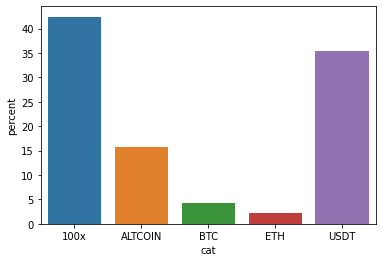

In [17]:
sns.barplot(x=df3['cat'], y=df3['percent'])

<AxesSubplot:xlabel='cat', ylabel='percent'>

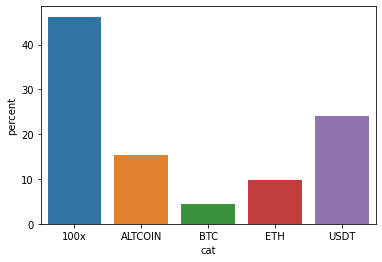

In [9]:
sns.barplot(x=df3['cat'], y=df3['percent'])